### Importing libs and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Data exploration

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.rename(columns={'Spending Score (1-100)': "spending_score", "Annual Income (k$)": "ann_income"}, inplace=True)
df.columns

Index(['CustomerID', 'Gender', 'Age', 'ann_income', 'spending_score'], dtype='object')

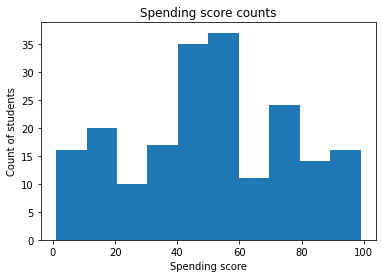

In [5]:
plt.hist(df["spending_score"], bins=10)
plt.title("Spending score counts")
plt.xlabel("Spending score")
plt.ylabel("Count of students")
plt.show()

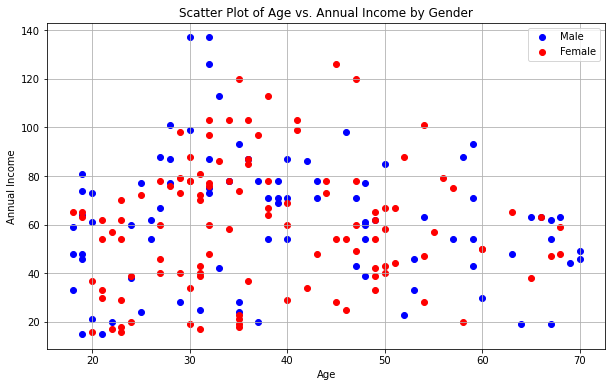

In [6]:
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

plt.figure(figsize=(10, 6))
plt.scatter(male_data['Age'], male_data['ann_income'], c='blue', label='Male')
plt.scatter(female_data['Age'], female_data['ann_income'], c='red', label='Female')

plt.title('Scatter Plot of Age vs. Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.grid(True)
plt.show()

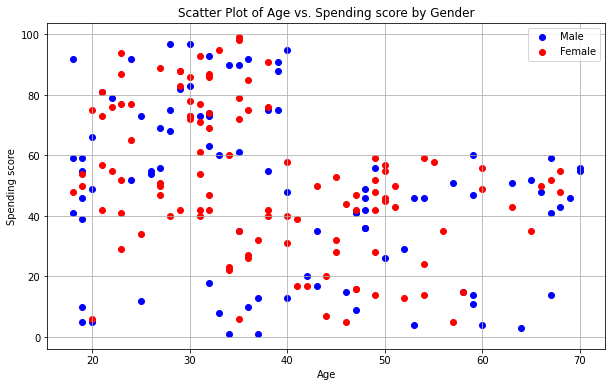

In [7]:
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

plt.figure(figsize=(10, 6))
plt.scatter(male_data['Age'], male_data['spending_score'], c='blue', label='Male')
plt.scatter(female_data['Age'], female_data['spending_score'], c='red', label='Female')

plt.title('Scatter Plot of Age vs. Spending score by Gender')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.legend()
plt.grid(True)
plt.show()

### Model creation

In [8]:
df.drop('CustomerID', axis=1, inplace=True)
df['Gender'] = np.where(df['Gender']=="Male", 1, 0)

In [9]:
cluster = []

for k in range(1, 11):
    kmean = KMeans(n_clusters=k).fit(df)
    cluster.append(kmean.inertia_)

D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


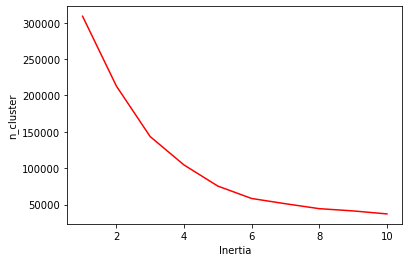

In [10]:
plt.plot(range(1, 11), cluster, 'r-')
plt.xlabel("Inertia")
plt.ylabel("n_cluster")
plt.show()

In [11]:
km = KMeans(n_clusters=5).fit(df)
df['labels'] = km.labels_

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


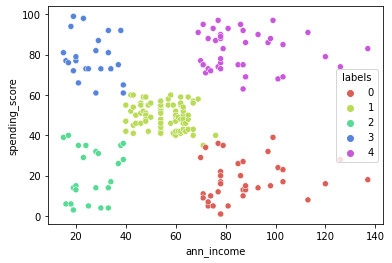

In [12]:
sns.scatterplot(df['ann_income'], df['spending_score'], hue=df['labels'],
palette=sns.color_palette('hls', 5))
plt.show()